# Определение перспективного тарифа для телеком компании

## Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов

#### Тариф «Смарт»

1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей

#### Тариф «Ультра»

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
2. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей

**Обратите внимание**: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

### Файлы с данными

- /datasets/calls.csv
- /datasets/internet.csv
- /datasets/messages.csv
- /datasets/tariffs.csv
- /datasets/users.csv

### Описание данных

Таблица _**users**_ (информация о пользователях):
- _user_id_ — уникальный идентификатор пользователя
- _first_name_ — имя пользователя
- _last_name_ — фамилия пользователя
- _age_ — возраст пользователя (годы)
- _reg_date_ — дата подключения тарифа (день, месяц, год)
- _churn_date_ — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- _city_ — город проживания пользователя
- _tariff_ — название тарифного плана


Таблица _**calls**_ (информация о звонках):
- _id_ — уникальный номер звонка
- _call_date_ — дата звонка
- _duration_ — длительность звонка в минутах
- _user_id_ — идентификатор пользователя, сделавшего звонок


Таблица _**messages**_ (информация о сообщениях):
- _id_ — уникальный номер сообщения
- _message_date_ — дата сообщения
- _user_id_ — идентификатор пользователя, отправившего сообщение


Таблица _**internet**_ (информация об интернет-сессиях):
- _id_ — уникальный номер сессии
- _mb_used_ — объём потраченного за сессию интернет-трафика (в мегабайтах)
- _session_date_ — дата интернет-сессии
- _user_id_ — идентификатор пользователя


Таблица _**tariffs**_ (информация о тарифах):
- _tariff_name_ — название тарифа
- _rub_monthly_fee_ — ежемесячная абонентская плата в рублях
- _minutes_included_ — количество минут разговора в месяц, включённых в абонентскую плату
- _messages_included_ — количество сообщений в месяц, включённых в абонентскую плату
- _mb_per_month_included_ — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- _rub_per_minute_ — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- _rub_per_message_ — стоимость отправки сообщения сверх тарифного пакета
- _rub_per_gb_ — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


**Примечание**. Если объединение таблиц методом _merge_ приводит к ошибке _dead kernell_, примените метод _join_ — это облегчит нагрузку на Jupyter Notebook.

### Оглавление

1. [Открытие данных](#step_1)
2. [Подготовка данных](#step_2)
    - Замена типа данных
    - Поиск и исправление ошибок в данных
    - Добавление новых столбцов
3. [Исследовательский анализ](#step_3)
4. [Проверка гипотез](#step_4)
5. [Общий вывод](#step_5)

## Открытие данных
<a id="step_1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats as st

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

#### Тарифы

In [3]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [4]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


У нас есть 2 тарифа **smart** и **ultra**. Вся информация по тарифам заполнена корректно.

#### Пользователи

In [5]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
users.duplicated().sum()

0

In [8]:
users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

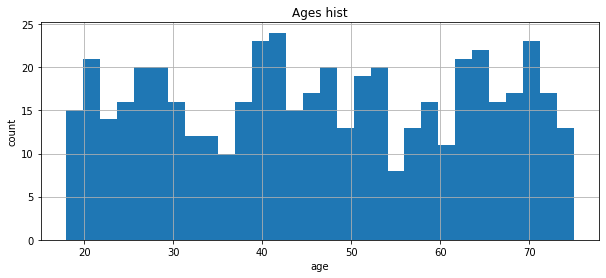

In [9]:
ax = users['age'].plot(kind='hist', bins=30, figsize=(10, 4), grid=True, title='Ages hist')
ax.set(xlabel="age", ylabel="count")
plt.show()

In [10]:
users['city'].value_counts()

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Химки               1
Иваново             1
Архангельск         1
Нижневартовск       1
Подольск            1
Name: city, Length: 76, dtype: int64

In [11]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

У нас 500 пользователей. Есть пропуски в столбце *churn_date*, но пропуски в этом столбце означают, что тариф еще действующий на момент выгрузки. Тип данных стоит привести к дате. Поле *reg_date* так же стоит привести к типу данных дата.

Полных дублей нет.

Возраст пользователей корректно заполнен от 18 до 75, медианный возраст 46.

Большое кол-во пользователей из Москвы, и пользователей тарифа smart более чем в 2 раза больше пользователей ultra.

С остальными данными все ок. 

Столбец с названием тарифа можно перименовать в **tariff_name** для удобного merge в дальнейшем.

#### Звонки

In [12]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [13]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [14]:
calls.duplicated().sum()

0

In [15]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

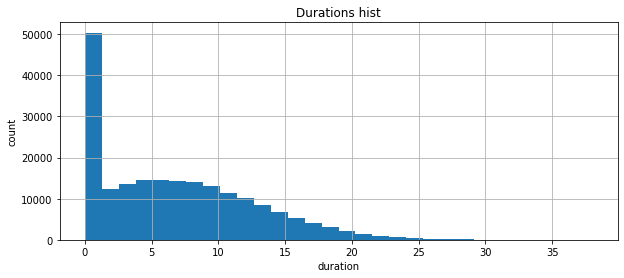

In [16]:
ax = calls['duration'].plot(kind='hist', bins=30, figsize=(10, 4), grid=True, title='Durations hist')
ax.set(xlabel="duration", ylabel="count")
plt.show()

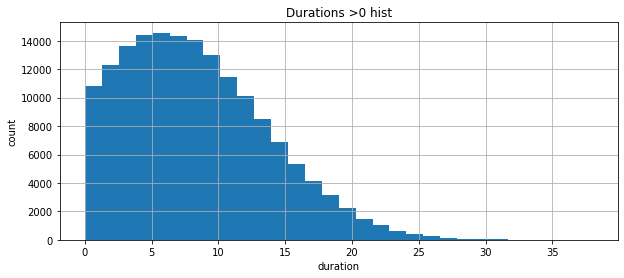

In [17]:
ax = calls.query('duration > 0')['duration'].plot(kind='hist', bins=30, figsize=(10, 4), grid=True, title='Durations >0 hist')
ax.set(xlabel="duration", ylabel="count")
plt.show()

In [18]:
len(calls['user_id'].unique())

492

In [19]:
calls.query('user_id not in @users.user_id')

,id,call_date,duration,user_id


In [20]:
calls['user_id'].value_counts().describe()

count     492.000000
mean      411.802846
std       291.803375
min        14.000000
25%       180.000000
50%       344.500000
75%       589.500000
max      1760.000000
Name: user_id, dtype: float64

202607 звонков. Пропусков в звонках нет. Полных дублей также нет.

Длительность звонка _duration_ необходимо округлить только вверх до минут и привести к целочисленному типу.

Дату звонка *call_date* необходимо привести к дате.

У нас есть большое кол-во звонков с длительностью 0 минут.

Проверили так же что нет в звонках user_id отсутствующих в users и посчитали кол-во пользователей с информацией о звонках, их 492 из 500.

В среднем на пользователя приходится 344 звонка, так же есть пользователь совершивший 1760 звонков.

#### Сообщения

In [21]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [22]:
messages.duplicated().sum()

0

In [23]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [24]:
messages['user_id'].value_counts().describe()

count     426.000000
mean      288.816901
std       267.607552
min         1.000000
25%        85.750000
50%       215.500000
75%       414.000000
max      1463.000000
Name: user_id, dtype: float64

In [25]:
len(messages['user_id'].unique())

426

In [26]:
messages.query('user_id not in @users.user_id')

,id,message_date,user_id


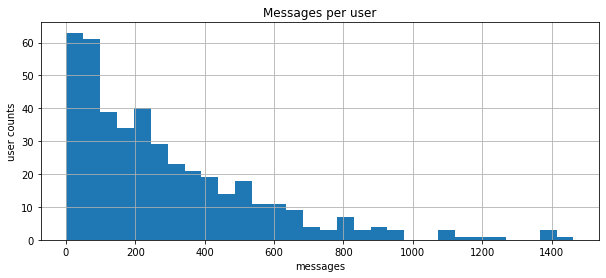

In [27]:
ax = messages['user_id'].value_counts().plot(kind='hist', bins=30, figsize=(10, 4), grid=True, title='Messages per user')
ax.set(xlabel="messages", ylabel="user counts")
plt.show()

123036 сообщений, дублей нет, пропусков нет. 426 пользователей отправляли сообщения из 500.

Дату сообщения необходимо конвертировать в дату.

В среднем на пользователи отправляют 215 сообщений в год. Есть пользователи отправившие больше 1000 сообщений за год.

#### Интернет

In [28]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [29]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [30]:
internet.duplicated().sum()

0

In [31]:
len(internet['user_id'].unique())

497

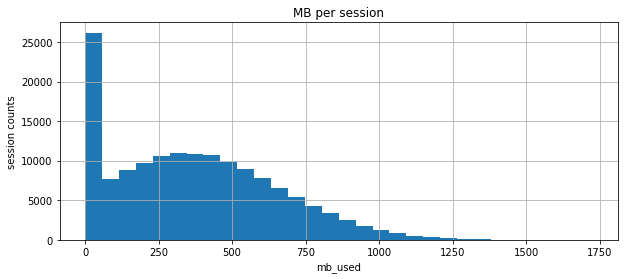

In [32]:
ax = internet['mb_used'].plot(kind='hist', bins=30, figsize=(10, 4), grid=True, title='MB per session')
ax.set(xlabel="mb_used", ylabel="session counts")
plt.show()

In [33]:
internet.query('user_id not in @users.user_id')

,Unnamed: 0,id,mb_used,session_date,user_id


В таблице с данными по интернет-сессиям 149396 строк от 497 пользователей. Пропусков нет, дублей нет. На гистограмме видно как распределились сессии по объему трафика, очень много коротких сессий (в том числе нулевых по размеру трафика). Наиболее часто сессия получается от 250 до 500 MB трафика.

Есть лишний столбец **Unnamed: 0** и столбец с датой необходимо конвертировать в в дату.

### Вывод

У нас есть 2 тарифа **smart** и **ultra**. Вся информация по тарифам заполнена корректно.

Всего **500 пользователей**. У пользователей есть пропуски в столбце с датой прекращения пользования тарифом *churn_date*, но пропуски в этом столбце означают, что тариф еще действующий на момент выгрузки. Тип данных стоит привести к дате. Поле с датой подключения тарифа *reg_date* так же стоит привести к типу данных дата. Полных дублей пользователей нет. Возраст пользователей корректно заполнен от 18 до 75, медианный возраст 46. Большое кол-во пользователей из Москвы. Пользователей тарифа smart более чем в 2 раза больше пользователей ultra.

Данные по звонкам содержат 202607 записей. Пропусков в звонках нет. Полных дублей также нет. Длительность звонка _duration_ необходимо округлить только вверх до минут и привести к целочисленному типу. Дату звонка *call_date* необходимо привести к дате. У нас есть большое кол-во звонков с длительностью 0 минут. Кол-во пользователей с информацией о звонках, их 492 из 500. В среднем на пользователя приходится 344 звонка, так же есть пользователь совершивший 1760 звонков.

Данные по сообьщениям содержат 123036 записей, дублей нет, пропусков нет. 426 пользователей отправляли сообщения из 500. Дату сообщения необходимо конвертировать в дату. В среднем на пользователи отправляют 215 сообщений в год. Есть пользователи отправившие больше 1000 сообщений за год.

В таблице с данными по интернет-сессиям 149396 строк от 497 пользователей. Пропусков нет, дублей нет. Наиболее часто сессия получается от 250 до 500 MB трафика. Есть лишний столбец **Unnamed: 0** и столбец с датой необходимо конвертировать в в дату. 

## Подготовка данных
<a id="step_2"></a>

### Замена типа данных

In [34]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [35]:
users.dtypes

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

In [36]:
calls.dtypes

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

In [37]:
messages.dtypes

id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

In [38]:
internet.dtypes

Unnamed: 0               int64
id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

Преобразовали типы данных всех столбцов содержащих дату.

### Требование Мегалайна

«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

In [39]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int')

In [40]:
calls.dtypes

id                   object
call_date    datetime64[ns]
duration              int64
user_id               int64
dtype: object

In [41]:
internet.dtypes

Unnamed: 0               int64
id                      object
mb_used                  int64
session_date    datetime64[ns]
user_id                  int64
dtype: object

Округлили значения длительности звонка и кол-во МБ инетрнет-сессии вверх и привели их к челочисленному типу.

### Ошибки в данных

#### Удалим лишний столбец

In [42]:
internet = internet.drop(['Unnamed: 0'], axis=1)

In [43]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


Удалили лишний столбец **Unnamed: 0** в данных по интернет-сессиям.

#### Проверим нет ли ошибок в датах звонков, сообщений и интернет-сессий по отношению к датам договора

In [44]:
users = users.rename(columns={'tariff':'tariff_name'})

In [45]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [46]:
users = pd.merge(users, tariffs, on='tariff_name')

In [47]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
2,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1
3,1013,36,NaT,Иваново,Борис,Андреенко,2018-11-14,ultra,1000,30720,3000,1950,150,1,1
4,1016,58,NaT,Омск,Марица,Сазонова,2018-11-21,ultra,1000,30720,3000,1950,150,1,1


In [48]:
calls_users = pd.merge(calls, users, on='user_id')
messages_users = pd.merge(messages, users, on='user_id')
internet_users = pd.merge(internet, users, on='user_id')

In [49]:
calls_users.query('call_date < reg_date')

,id,call_date,duration,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute


In [50]:
calls_users.query('churn_date.notnull() and call_date > churn_date')

,id,call_date,duration,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute


In [51]:
messages_users.query('message_date < reg_date')

,id,message_date,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute


In [52]:
messages_users.query('churn_date.notnull() and message_date > churn_date')

,id,message_date,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute


In [53]:
internet_users.query('session_date < reg_date')

,id,mb_used,session_date,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute


In [54]:
internet_users.query('churn_date.notnull() and session_date > churn_date')

,id,mb_used,session_date,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute


Проверили наличие ошибок с датами подписания и расторжения договоров относительно дат звонков, сообщений и интернет-сессий. Ошибок не нашлось.

### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [55]:
calls['month'] = calls['call_date'].dt.month

In [56]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [57]:
calls_per_month = (
    calls
    .pivot_table(index=['user_id', 'month'], values=['id', 'duration'], aggfunc={'id':'count', 'duration':'sum'})
    .rename(columns={'id':'count'})
    .reset_index()
)

In [58]:
calls_per_month.head()

,user_id,month,duration,count
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58


In [59]:
calls_per_month['count'].describe()

count    3174.000000
mean       63.833333
std        32.678036
min         1.000000
25%        41.000000
50%        63.000000
75%        83.000000
max       244.000000
Name: count, dtype: float64

In [60]:
calls_per_month['duration'].describe()

count    3174.000000
mean      456.931632
std       238.031270
min         0.000000
25%       290.000000
50%       447.000000
75%       592.000000
max      1673.000000
Name: duration, dtype: float64

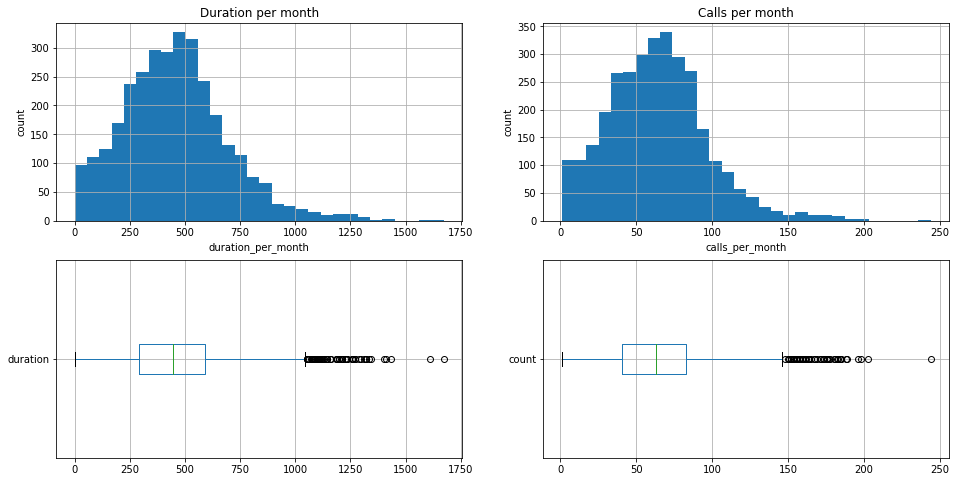

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

ax1 = calls_per_month['duration'].plot(kind='hist', bins=30, grid=True, title='Duration per month', ax=axes[0,0])
ax1.set(xlabel="duration_per_month", ylabel="count")

ax2 = calls_per_month.boxplot(column=['duration'], ax=axes[1,0], vert=False)

ax3 = calls_per_month['count'].plot(kind='hist', bins=30, grid=True, title='Calls per month', ax=axes[0,1])
ax3.set(xlabel="calls_per_month", ylabel="count")

ax4 = calls_per_month.boxplot(column=['count'], ax=axes[1,1], vert=False)

plt.show()

Кол-во звонков и минут в месяц по каждому пользователю сохранили в датафрйеме calls_per_month.

Среднее кол-во звонков пользователя в месяц ~63 звонка и 447 минут средння длительность всех звонков в месяц одного пользователя.

### Количество отправленных сообщений по месяцам

In [62]:
messages['month'] = messages['message_date'].dt.month

In [63]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


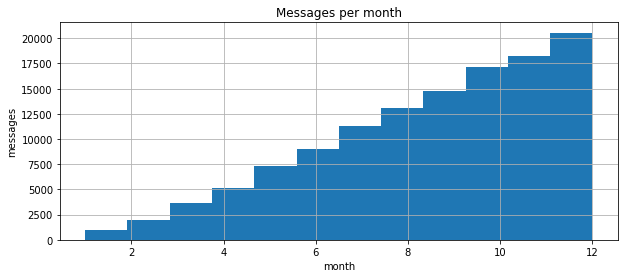

In [64]:
ax = messages['month'].plot(kind='hist', bins=12, figsize=(10, 4), grid=True, title='Messages per month')
ax.set(xlabel="month", ylabel="messages")
plt.show()

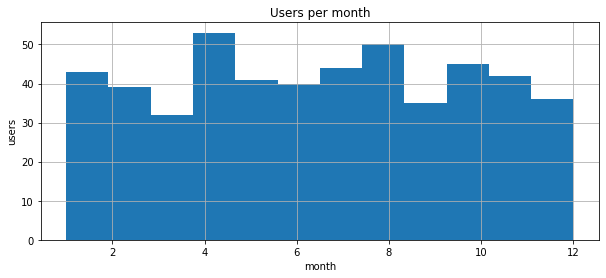

In [65]:
users['reg_month'] = users['reg_date'].dt.month
users['churn_month'] = users['churn_date'].dt.month
ax = users['reg_month'].plot(kind='hist', bins=12, figsize=(10, 4), grid=True, title='Users per month')
ax.set(xlabel="month", ylabel="users")
plt.show()

In [66]:
messages_per_month = (
    messages
    .pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
    .rename(columns={'id':'count'})
    .reset_index()
)

In [67]:
messages_per_month.head()

,user_id,month,count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [68]:
messages_per_month['count'].describe()

count    2717.000000
mean       45.283769
std        35.051363
min         1.000000
25%        19.000000
50%        38.000000
75%        63.000000
max       224.000000
Name: count, dtype: float64

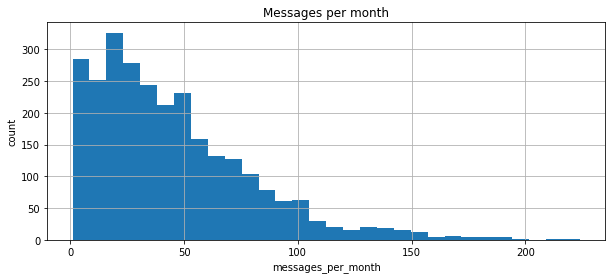

In [69]:
ax = messages_per_month['count'].plot(kind='hist', bins=30, figsize=(10, 4), grid=True, title='Messages per month')
ax.set(xlabel="messages_per_month", ylabel="count")
plt.show()

Посчитали кол-во сообщений пользователей по месяцам и сохранили в датафрейме messages_per_month.

Мы видим как распределились сообщения по месяцам. Для общей картины построили гистограмму по подключениям пользователей и она равномерная, т.е. 500 пользователей подключались примерно равномерно в течении года, поэтому и кол-во сообщений становится с каждым месяцем все больше. С остальными показателями будет тоже самое.

В среднем пользователи отправляют 38 сообщений, на гистограмме так же видно что пользователи в основном отправляют до 50 сообщений в месяц.

### Объем израсходованного интернет-трафика по месяцам

In [70]:
internet['month'] = internet['session_date'].dt.month

In [71]:
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9


In [72]:
internet_per_month = (
    internet
    .pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
    .reset_index()
)

In [73]:
internet_per_month.head()

,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


In [74]:
internet_per_month['mb_used'].describe()

count     3203.000000
mean     17286.749610
std       7523.580332
min          0.000000
25%      12543.000000
50%      16985.000000
75%      21455.500000
max      49789.000000
Name: mb_used, dtype: float64

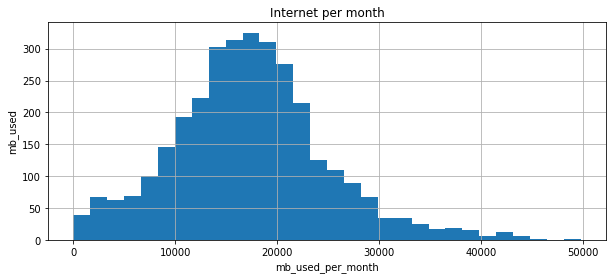

In [75]:
ax = internet_per_month['mb_used'].plot(kind='hist', bins=30, figsize=(10, 4), grid=True, title='Internet per month')
ax.set(xlabel="mb_used_per_month", ylabel="mb_used")
plt.show()

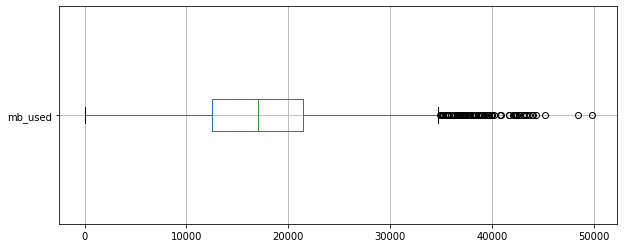

In [76]:
internet_per_month.boxplot(column=['mb_used'], figsize=(10, 4), vert=False);

Объем израсходованного интернет-трафика по месяцам сохранили в датафрейме internet_per_month.

На гистограмме *__Internet per month__* видно, что наиболее популярный объем трафика за месяц от 14 до 21 GB в месяц, медианное значение ~17 GB.

### Помесячную выручку с каждого пользователя

In [77]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,reg_month,churn_month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5,NaN
1,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,8,NaN
2,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1,5,NaN
3,1013,36,NaT,Иваново,Борис,Андреенко,2018-11-14,ultra,1000,30720,3000,1950,150,1,1,11,NaN
4,1016,58,NaT,Омск,Марица,Сазонова,2018-11-21,ultra,1000,30720,3000,1950,150,1,1,11,NaN


In [78]:
calls_per_month = pd.merge(
    calls_per_month, 
    users[['user_id', 'minutes_included', 'rub_per_minute']], 
    on='user_id'
)

messages_per_month = pd.merge(
    messages_per_month, 
    users[['user_id', 'messages_included', 'rub_per_message']], 
    on='user_id'
)

internet_per_month = pd.merge(
    internet_per_month, 
    users[['user_id', 'mb_per_month_included', 'rub_per_gb']], 
    on='user_id'
)

In [79]:
calls_per_month['calls_revenue'] = (calls_per_month['duration'] > calls_per_month['minutes_included']) \
                                    * (calls_per_month['duration'] - calls_per_month['minutes_included']) \
                                    * calls_per_month['rub_per_minute']

In [80]:
messages_per_month['messages_revenue'] = (messages_per_month['count'] > messages_per_month['messages_included']) \
                                            * (messages_per_month['count'] - messages_per_month['messages_included']) \
                                            * messages_per_month['rub_per_message']

In [81]:
internet_per_month['internet_revenue'] = (internet_per_month['mb_used'] > internet_per_month['mb_per_month_included']) \
                                            * (np.ceil((internet_per_month['mb_used'] - internet_per_month['mb_per_month_included']) / 1024)) \
                                            * internet_per_month['rub_per_gb']

In [82]:
calls_per_month.sample(5)

,user_id,month,duration,count,minutes_included,rub_per_minute,calls_revenue
1548,1248,8,667,98,500,3,501
234,1036,10,530,72,500,3,90
1533,1246,9,70,10,500,3,0
3134,1492,8,603,78,500,3,309
2891,1455,9,442,57,3000,1,0


In [83]:
messages_per_month.sample(5)

,user_id,month,count,messages_included,rub_per_message,messages_revenue
845,1160,10,41,50,3,0
1587,1308,5,30,50,3,0
895,1170,12,46,50,3,0
2149,1401,12,49,50,3,0
1627,1314,8,34,50,3,0


In [84]:
internet_per_month.sample(5)

,user_id,month,mb_used,mb_per_month_included,rub_per_gb,internet_revenue
2268,1360,7,12840,30720,150,-0.0
1549,1244,8,19894,15360,200,1000.0
653,1102,11,20763,15360,200,1200.0
1405,1219,12,16713,15360,200,400.0
3162,1492,7,15237,15360,200,-0.0


Numpy почему-то вернула -0.0 при умножении отрицательного числа на False, хотя я ожидал 0 ну или 0.0

In [85]:
users.query('user_id == 1251')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,reg_month,churn_month
336,1251,48,NaT,Пермь,Роксана,Тетерина,2018-02-13,smart,50,15360,500,550,200,3,3,2,NaN


In [86]:
internet_per_month.query('user_id == 1251')

,user_id,month,mb_used,mb_per_month_included,rub_per_gb,internet_revenue
1592,1251,2,14575,15360,200,-0.0
1593,1251,3,18174,15360,200,600.0
1594,1251,4,21161,15360,200,1200.0
1595,1251,5,25081,15360,200,2000.0
1596,1251,6,26154,15360,200,2200.0
1597,1251,7,23478,15360,200,1600.0
1598,1251,8,23785,15360,200,1800.0
1599,1251,9,20399,15360,200,1000.0
1600,1251,10,26457,15360,200,2200.0
1601,1251,11,24533,15360,200,1800.0


In [87]:
calls_per_month.head()

,user_id,month,duration,count,minutes_included,rub_per_minute,calls_revenue
0,1000,5,159,22,3000,1,0
1,1000,6,172,43,3000,1,0
2,1000,7,340,47,3000,1,0
3,1000,8,408,52,3000,1,0
4,1000,9,466,58,3000,1,0


In [88]:
messages_per_month.head()

,user_id,month,count,messages_included,rub_per_message,messages_revenue
0,1000,5,22,1000,1,0
1,1000,6,60,1000,1,0
2,1000,7,75,1000,1,0
3,1000,8,81,1000,1,0
4,1000,9,57,1000,1,0


In [89]:
internet_per_month.head()

,user_id,month,mb_used,mb_per_month_included,rub_per_gb,internet_revenue
0,1000,5,2256,30720,150,-0.0
1,1000,6,23257,30720,150,-0.0
2,1000,7,14016,30720,150,-0.0
3,1000,8,14070,30720,150,-0.0
4,1000,9,14581,30720,150,-0.0


In [90]:
revenue_month = pd.merge(
    calls_per_month[['user_id', 'month', 'calls_revenue']], 
    messages_per_month[['user_id', 'month', 'messages_revenue']], 
    on=['user_id', 'month'], 
    how='outer'
)

revenue_month = pd.merge(
    revenue_month, 
    internet_per_month[['user_id', 'month', 'internet_revenue']], 
    on=['user_id', 'month'], 
    how='outer'
)

revenue_month = pd.merge(
    revenue_month, 
    users[['user_id', 'rub_monthly_fee']], 
    on=['user_id'], 
    how='outer'
)

In [91]:
len(revenue_month['user_id'].unique())

500

Проверили, что после объединений у нас кол-во пользователей не поменялось.

In [92]:
revenue_month.isna().sum()

user_id               0
month                 2
calls_revenue        42
messages_revenue    499
internet_revenue     13
rub_monthly_fee       0
dtype: int64

In [93]:
revenue_month = revenue_month.fillna(0.0)

In [94]:
revenue_month['revenue'] = revenue_month['calls_revenue'] \
                            + revenue_month['messages_revenue'] \
                            + revenue_month['internet_revenue'] \
                            + revenue_month['rub_monthly_fee']

In [95]:
revenue_month.sample(5)

,user_id,month,calls_revenue,messages_revenue,internet_revenue,rub_monthly_fee,revenue
596,1096,7.0,0.0,0.0,-0.0,1950,1950.0
1953,1312,7.0,0.0,0.0,-0.0,550,550.0
1618,1260,11.0,54.0,0.0,-0.0,550,604.0
602,1097,6.0,0.0,0.0,-0.0,1950,1950.0
2819,1441,11.0,0.0,0.0,2000.0,550,2550.0


###  Вывод

Мы посчитали выручку за каждый месяц по каждому пользователю, предварительно посчитав выручку по звонкам превысившим лимит минут, выручку по сообщениям превысившим лимит и выручку от интернет-трафика превысившего лимит в соответствии с тарифом, сложили получившиеся показатели и добавили абоненскую плату.

Результат по ежемесячной выручке лежит в датафрейме **_revenue_month_**

## Исследовательский анализ
<a id="step_3"></a>

#### Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Нам необходимо будет из выборки убирать данные за первый месяц пользования и последний в случаее прекращения договора, т.к. он будет не полный и показатели могут искажаться из-за этого. Но посмотрим мы на оба варианта.

In [96]:
calls_per_month = pd.merge(
    calls_per_month, 
    users[['user_id', 'reg_month', 'churn_month', 'tariff_name']], 
    on ='user_id', 
    how='left'
)

messages_per_month = pd.merge(
    messages_per_month, 
    users[['user_id', 'reg_month', 'churn_month', 'tariff_name']], 
    on ='user_id', 
    how='left'
)

internet_per_month = pd.merge(
    internet_per_month, 
    users[['user_id', 'reg_month', 'churn_month', 'tariff_name']], 
    on ='user_id', 
    how='left'
)

In [97]:
calls_per_month.head()

,user_id,month,duration,count,minutes_included,rub_per_minute,calls_revenue,reg_month,churn_month,tariff_name
0,1000,5,159,22,3000,1,0,5,NaN,ultra
1,1000,6,172,43,3000,1,0,5,NaN,ultra
2,1000,7,340,47,3000,1,0,5,NaN,ultra
3,1000,8,408,52,3000,1,0,5,NaN,ultra
4,1000,9,466,58,3000,1,0,5,NaN,ultra


In [98]:
filter_month = 'month > reg_month and (churn_month.isnull() or month < churn_month)'
smart_filter = filter_month + ' and ' + 'tariff_name == "smart"'
ultra_filter = filter_month + ' and ' + 'tariff_name == "ultra"'

In [99]:
calls_per_month.query(filter_month)['duration'].describe()

count    2647.000000
mean      495.938043
std       226.275726
min         0.000000
25%       342.000000
50%       479.000000
75%       617.500000
max      1673.000000
Name: duration, dtype: float64

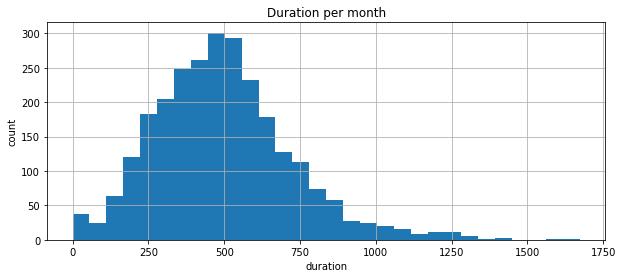

In [100]:
ax = calls_per_month.query(filter_month)['duration'].plot(
    kind='hist', 
    bins=30, 
    figsize=(10, 4), 
    grid=True, 
    title='Duration per month'
)

ax.set(xlabel="duration", ylabel="count")
plt.show()

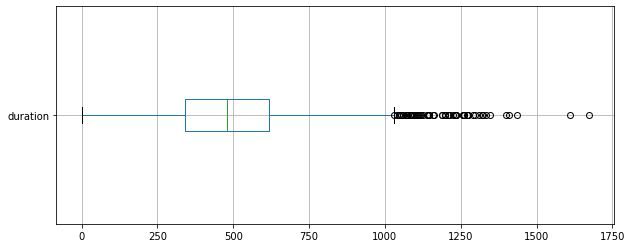

In [101]:
calls_per_month.query(filter_month).boxplot(column=['duration'], figsize=(10, 4), vert=False);

Средняя длительность разговора в месяц составляет 497 минут. Это показатели на всей выборке. Посмотрим, что со средней длительностью на каждом тарифе.

In [102]:
calls_per_month.query(smart_filter)['duration'].describe()

count    1852.000000
mean      454.226782
std       174.971460
min         0.000000
25%       333.000000
50%       455.000000
75%       565.250000
max      1435.000000
Name: duration, dtype: float64

In [103]:
calls_per_month.query(ultra_filter)['duration'].describe()

count     795.000000
mean      593.106918
std       292.819805
min         0.000000
25%       371.500000
50%       575.000000
75%       785.000000
max      1673.000000
Name: duration, dtype: float64

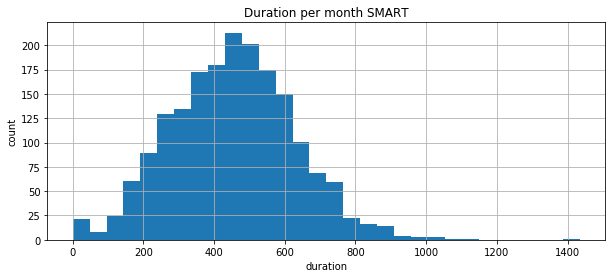

In [104]:
ax = calls_per_month.query(smart_filter)['duration'].plot(
    kind='hist', 
    bins=30, 
    figsize=(10, 4), 
    grid=True, 
    title='Duration per month SMART'
)
ax.set(xlabel="duration", ylabel="count")
plt.show()

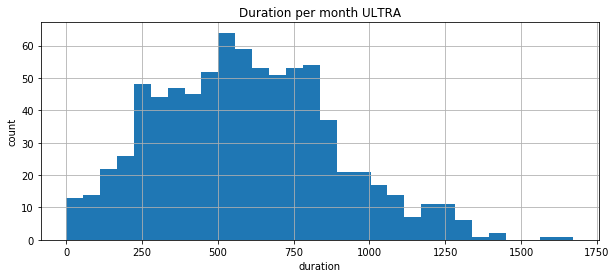

In [105]:
ax = calls_per_month.query(ultra_filter)['duration'].plot(
    kind='hist', 
    bins=30, 
    figsize=(10, 4), 
    grid=True, 
    title='Duration per month ULTRA'
)

ax.set(xlabel="duration", ylabel="count")
plt.show()

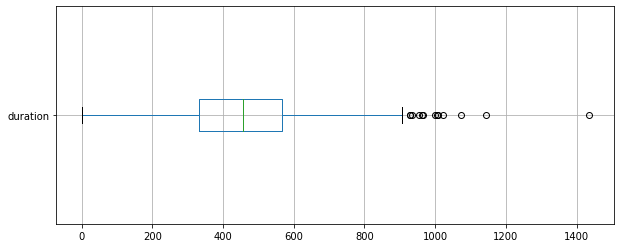

In [106]:
calls_per_month.query(smart_filter).boxplot(column=['duration'], figsize=(10, 4), vert=False);

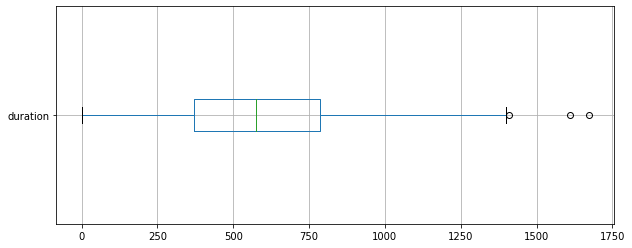

In [107]:
calls_per_month.query(ultra_filter).boxplot(column=['duration'], figsize=(10, 4), vert=False);

In [108]:
smart_duration_med = calls_per_month.query(smart_filter)['duration'].median()
ultra_duration_med = calls_per_month.query(ultra_filter)['duration'].median()
(smart_duration_med, ultra_duration_med)

(455.0, 575.0)

In [109]:
smart_duration_var = np.var(calls_per_month.query(smart_filter)['duration'], ddof=1)
ultra_duration_var = np.var(calls_per_month.query(ultra_filter)['duration'], ddof=1)
(smart_duration_var, ultra_duration_var)

(30615.01175128032, 85743.43817625906)

In [110]:
smart_duration_std = np.sqrt(smart_duration_var)
ultra_duration_std = np.sqrt(ultra_duration_var)
(smart_duration_std, ultra_duration_std)

(174.97145981925257, 292.8198049590551)

По тарифу **Смарт** пользователям чаще всего хватает 455 минут в месяц, т.к. лимит по тарифу 500 минут то очевидно что большинство пытается уложиться в этот лимит, но все же есть те кому не хватает.

По тарифу **Ультра** медиана длительности звонков в месяц 575 минут в месяц, но при этом у нас большой разброс, о чем свидетельствуют гораздо большие значения стандартного отклонения и дисперсии. Но все же в этом тарифе лимит 3000 минут, пользователям этого оказывается более чем достаточно.

In [111]:
messages_per_month.head()

,user_id,month,count,messages_included,rub_per_message,messages_revenue,reg_month,churn_month,tariff_name
0,1000,5,22,1000,1,0,5,NaN,ultra
1,1000,6,60,1000,1,0,5,NaN,ultra
2,1000,7,75,1000,1,0,5,NaN,ultra
3,1000,8,81,1000,1,0,5,NaN,ultra
4,1000,9,57,1000,1,0,5,NaN,ultra


In [112]:
messages_per_month.query(filter_month)['count'].describe()

count    2277.000000
mean       48.678964
std        35.397643
min         1.000000
25%        22.000000
50%        41.000000
75%        66.000000
max       224.000000
Name: count, dtype: float64

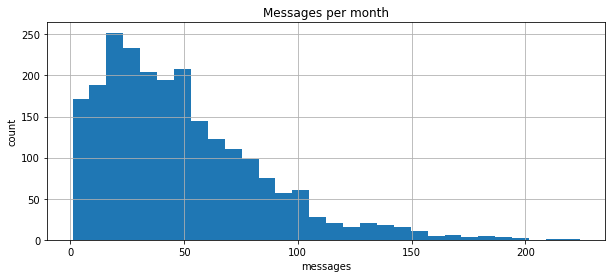

In [113]:
ax = messages_per_month.query(filter_month)['count'].plot(
    kind='hist', 
    bins=30, 
    figsize=(10, 4), 
    grid=True, 
    title='Messages per month'
)

ax.set(xlabel="messages", ylabel="count")
plt.show()

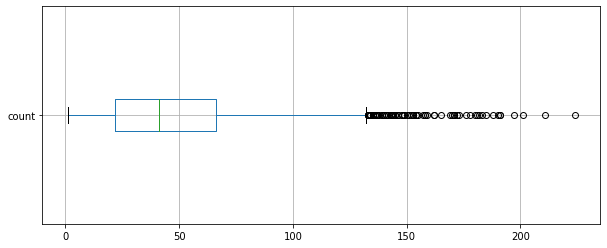

In [114]:
messages_per_month.query(filter_month).boxplot(column=['count'], figsize=(10, 4), vert=False);

In [115]:
messages_per_month.query(smart_filter)['count'].describe()

count    1611.000000
mean       41.718808
std        26.849056
min         1.000000
25%        21.000000
50%        38.000000
75%        59.000000
max       143.000000
Name: count, dtype: float64

In [116]:
messages_per_month.query(ultra_filter)['count'].describe()

count    666.000000
mean      65.515015
std       46.281037
min        1.000000
25%       28.000000
50%       55.000000
75%       94.000000
max      224.000000
Name: count, dtype: float64

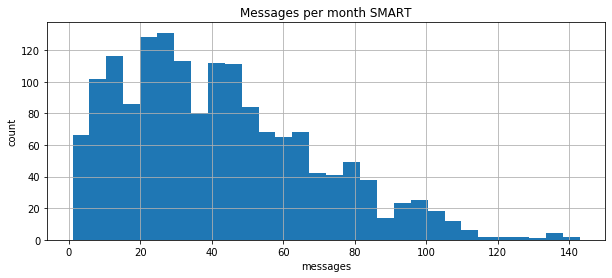

In [117]:
ax = messages_per_month.query(smart_filter)['count'].plot(
    kind='hist', 
    bins=30, 
    figsize=(10, 4), 
    grid=True, 
    title='Messages per month SMART'
)
ax.set(xlabel="messages", ylabel="count")
plt.show()

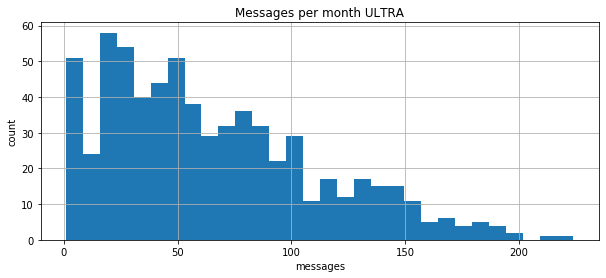

In [118]:
ax = messages_per_month.query(ultra_filter)['count'].plot(
    kind='hist', 
    bins=30, 
    figsize=(10, 4), 
    grid=True, 
    title='Messages per month ULTRA'
)

ax.set(xlabel="messages", ylabel="count")
plt.show()

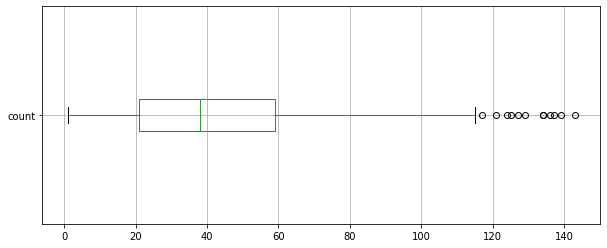

In [119]:
messages_per_month.query(smart_filter).boxplot(column=['count'], figsize=(10, 4), vert=False);

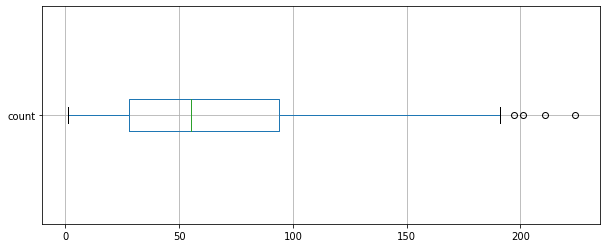

In [120]:
messages_per_month.query(ultra_filter).boxplot(column=['count'], figsize=(10, 4), vert=False);

In [121]:
smart_messages_med = messages_per_month.query(smart_filter)['count'].median()
ultra_messages_med = messages_per_month.query(ultra_filter)['count'].median()
(smart_messages_med, ultra_messages_med)

(38.0, 55.0)

In [122]:
smart_messages_var = np.var(messages_per_month.query(smart_filter)['count'], ddof=1)
ultra_messages_var = np.var(messages_per_month.query(ultra_filter)['count'], ddof=1)
(smart_messages_var, ultra_messages_var)

(720.8718137339949, 2141.9343606764655)

In [123]:
smart_messages_std = np.sqrt(smart_messages_var)
ultra_messages_std = np.sqrt(ultra_messages_var)
(smart_messages_std, ultra_messages_std)

(26.849056105084866, 46.2810367286264)

На обоих тарифах все показатели по отправленным сообщениям указывают на положительную скошенность, об этом можно судить глядя на медиану, которая меньше среднего, на расстояние между первым квартилем и медианой, которое меньше и третьего квартира и медианы, и по гистограмме.

Пользователи тарифа **Ультра** не привышают своего месячного лимита в 1000 сообщений, отправляя в среднем 55 сообщений, против 38 сообщений у пользователей тарифа **Смарт** с лимитом 50 сообщений. Но мы снова видим значительно большие показатели дисперсии и стандартного отклонения у пользователей тарифа **Ультра**.

In [124]:
internet_per_month.head()

,user_id,month,mb_used,mb_per_month_included,rub_per_gb,internet_revenue,reg_month,churn_month,tariff_name
0,1000,5,2256,30720,150,-0.0,5,NaN,ultra
1,1000,6,23257,30720,150,-0.0,5,NaN,ultra
2,1000,7,14016,30720,150,-0.0,5,NaN,ultra
3,1000,8,14070,30720,150,-0.0,5,NaN,ultra
4,1000,9,14581,30720,150,-0.0,5,NaN,ultra


In [125]:
internet_per_month.query(filter_month)['mb_used'].describe()

count     2673.000000
mean     18740.378601
std       6800.759294
min       1153.000000
25%      14283.000000
50%      17995.000000
75%      22036.000000
max      49789.000000
Name: mb_used, dtype: float64

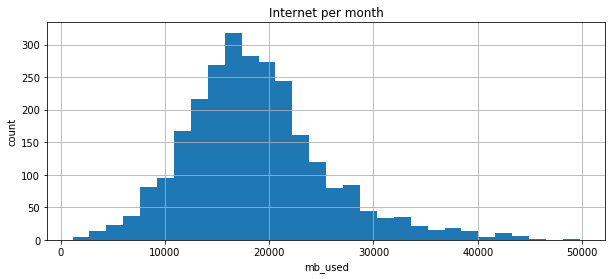

In [126]:
ax = internet_per_month.query(filter_month)['mb_used'].plot(
    kind='hist', 
    bins=30, 
    figsize=(10, 4), 
    grid=True, 
    title='Internet per month'
)

ax.set(xlabel="mb_used", ylabel="count")
plt.show()

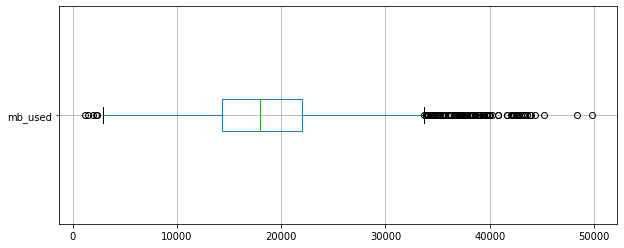

In [127]:
internet_per_month.query(filter_month).boxplot(column=['mb_used'], figsize=(10, 4), vert=False);

In [128]:
internet_per_month.query(smart_filter)['mb_used'].describe()

count     1857.000000
mean     17573.408724
std       4903.668562
min       2003.000000
25%      14170.000000
50%      17341.000000
75%      20723.000000
max      38610.000000
Name: mb_used, dtype: float64

In [129]:
internet_per_month.query(ultra_filter)['mb_used'].describe()

count      816.000000
mean     21396.093137
std       9311.748880
min       1153.000000
25%      14671.750000
50%      20912.000000
75%      27791.000000
max      49789.000000
Name: mb_used, dtype: float64

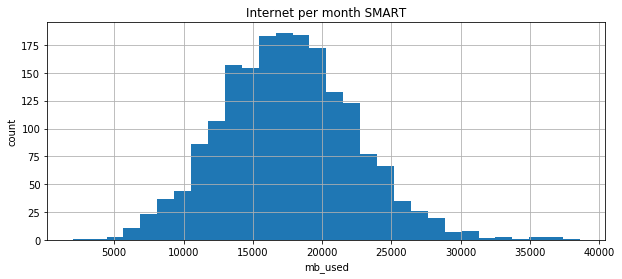

In [130]:
ax = internet_per_month.query(smart_filter)['mb_used'].plot(
    kind='hist', 
    bins=30, 
    figsize=(10, 4), 
    grid=True, 
    title='Internet per month SMART'
)

ax.set(xlabel="mb_used", ylabel="count")
plt.show()

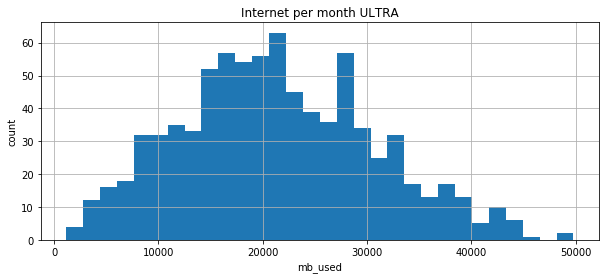

In [131]:
ax = internet_per_month.query(ultra_filter)['mb_used'].plot(
    kind='hist', 
    bins=30, 
    figsize=(10, 4), 
    grid=True, 
    title='Internet per month ULTRA'
)

ax.set(xlabel="mb_used", ylabel="count")
plt.show()


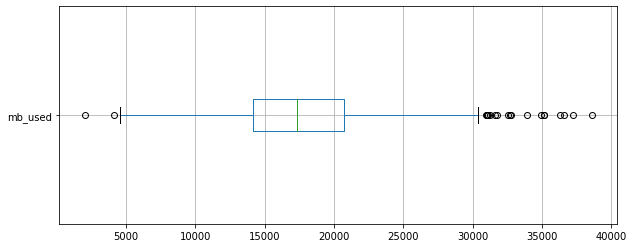

In [132]:
internet_per_month.query(smart_filter).boxplot(column=['mb_used'], figsize=(10, 4), vert=False);

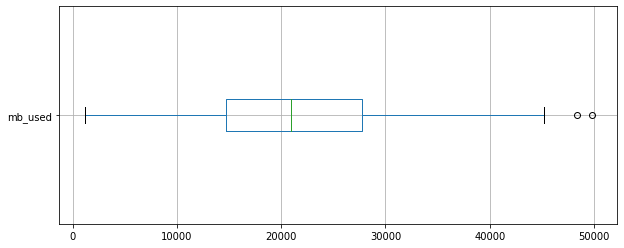

In [133]:
internet_per_month.query(ultra_filter).boxplot(column=['mb_used'], figsize=(10, 4), vert=False);

In [134]:
smart_internet_med = internet_per_month.query(smart_filter)['mb_used'].median()
ultra_internet_med = internet_per_month.query(ultra_filter)['mb_used'].median()
(smart_internet_med, ultra_internet_med)

(17341.0, 20912.0)

In [135]:
smart_internet_var = np.var(internet_per_month.query(smart_filter)['mb_used'], ddof=1)
ultra_internet_var = np.var(internet_per_month.query(ultra_filter)['mb_used'], ddof=1)
(smart_internet_var, ultra_internet_var)

(24045965.364643686, 86708667.20358475)

In [136]:
smart_internet_std = np.sqrt(smart_internet_var)
ultra_internet_std = np.sqrt(ultra_internet_var)
(smart_internet_std, ultra_internet_std)

(4903.668561867094, 9311.74887996797)

Среднее и медиана месячного интернет трафика у пользователей тарифа **Смарт** примерно одинаковы и составляют чуть более 17 GB при лимите в 15 GB. Только 25% пользователей этого тарифа укладываются в лимит тарифа.

У пользователей же тарифа **Ультра** лимит гораздо больше и составляет 30 GB, и этого оказывается достаточно большинству. Медиана чуть меньше среднего говорит о небольшой скошенности вправо, что видно на гистограмме. И так же у нас большее стандартное отклонение и дисперсия чем у пользователей тарифа **Смарт**. Еще виден один пик 28-29 GB, возможно эти пользователи не покупают дополнительный трафик при исчерпании лимита.

#### Вывод

*__Звонки__*:

По тарифу Смарт пользователям чаще всего хватает 455 минут в месяц, т.к. лимит по тарифу 500 минут то очевидно что большинство пытается уложиться в этот лимит, но все же есть те кому не хватает.

По тарифу Ультра медиана длительности звонков в месяц 575 минут в месяц, но при этом у нас большой разброс, о чем свидетельствуют гораздо большие значения стандартного отклонения и дисперсии. Но все же в этом тарифе лимит 3000 минут, пользователям этого оказывается более чем достаточно.


*__Сообщения__*:

На обоих тарифах все показатели указывают на положительную скошенность, об этом можно судить глядя на медиану меньшую среднего, на расстояние между первым квартилем и медианой, которое меньше и третьего квартира и медианы, и по гистограмме.

Пользователи тарифа Ультра не привышают своего месячного лимита в 1000 сообщений, отправляя в среднем 55 сообщений, против 38 сообщений у пользователей тарифа Смарт с лимитом 50 сообщений. Но мы снова видим значительно большие показатели дисперсии и стандартного отклонения у пользователей тарифа Ультра.


*__Интернет__*:

Среднее и медиана месячного интернет трафика у пользователей тарифа Смарт примерно одинаковы и составляют чуть более 17 GB при лимите в 15 GB. Только 25% пользователей этого тарифа укладываются в лимит тарифа.

У пользователей же тарифа Ультра лимит гораздо больше и составляет 30 GB, и этого оказывается достаточно большинству. Медиана чуть меньше среднего говорит о небольшой скошенности вправо, что видно на гистограмме. И так же у нас большее стандартное отклонение и дисперсия чем у пользователей тарифа Смарт. Еще виден один пик 28-29 GB, возможно эти пользователи не покупают дополнительный трафик при исчерпании лимита.

## Проверка гипотез
<a id="step_4"></a>

In [137]:
revenue_month = pd.merge(
    revenue_month, 
    users[['user_id', 'reg_month', 'churn_month', 'tariff_name', 'city']], 
    on ='user_id', 
    how='left'
)

In [138]:
revenue_month.head()

,user_id,month,calls_revenue,messages_revenue,internet_revenue,rub_monthly_fee,revenue,reg_month,churn_month,tariff_name,city
0,1000,5.0,0.0,0.0,-0.0,1950,1950.0,5,NaN,ultra,Краснодар
1,1000,6.0,0.0,0.0,-0.0,1950,1950.0,5,NaN,ultra,Краснодар
2,1000,7.0,0.0,0.0,-0.0,1950,1950.0,5,NaN,ultra,Краснодар
3,1000,8.0,0.0,0.0,-0.0,1950,1950.0,5,NaN,ultra,Краснодар
4,1000,9.0,0.0,0.0,-0.0,1950,1950.0,5,NaN,ultra,Краснодар


#### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [139]:
(revenue_month.query(smart_filter)['revenue'].mean(), revenue_month.query(ultra_filter)['revenue'].mean())

(1412.6790522347874, 2093.0741190765493)

In [140]:
smart_revenue = revenue_month.query(smart_filter)['revenue']
ultra_revenue = revenue_month.query(ultra_filter)['revenue']

Критический уровень статистической значимости мы задали 0,05. Мы хотим получить 95% вероятности правильной проверки гипотезы.

- **Нулевая гипотеза**: средняя выручка по тарифа Смарт и Ультра __не различается__
- **Альтернативная гипотеза**:  средняя выручка по тарифа Смарт и Ультра __различается__

Посмотрим сначала на дисперсии дух выборок, равные ли они.

In [141]:
smart_revenue_var = np.var(smart_revenue, ddof=1)
ultra_revenue_var = np.var(ultra_revenue, ddof=1)
(smart_revenue_var, ultra_revenue_var)

(692161.3872387565, 167798.6891468812)

Дисперсии сильно различаются, значит мы будем использовать equal_var = False в Т-тесте.

In [142]:
alpha = .05

In [143]:
results = st.ttest_ind(smart_revenue, ultra_revenue, equal_var=False)

In [144]:
print('p-значение:', results.pvalue)

p-значение: 1.642911141789544e-154


In [145]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


В качестве нулевой гипотезы мы проверили равенство средней выручки по тарифам **Смарт** и **Ультра**, гипотеза не подтвердилась, следовательно сработала альтернативная гипотеза средняя выручка различается статистически значимо.

#### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [146]:
moscow_filter = filter_month + ' and ' + 'city == "Москва"'
other_filter = filter_month + ' and ' + 'city != "Москва"'

In [147]:
(revenue_month.query(moscow_filter)['revenue'].mean(), revenue_month.query(other_filter)['revenue'].mean())

(1648.2942345924453, 1615.4584290307762)

In [148]:
moscov_revenue = revenue_month.query(moscow_filter)['revenue']
other_revenue = revenue_month.query(other_filter)['revenue']

In [149]:
results = st.ttest_ind(moscov_revenue, other_revenue, equal_var=True)

In [150]:
print('p-значение:', results.pvalue)

p-значение: 0.4029632752805238


In [151]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Критический уровень статистической значимости мы задали 0,05. Мы хотим получить 95% вероятности правилоной проверки гипотезы.

В качестве нулевой гипотезы мы проверили равенство средней выручки по Москве и другим регионам, гипотеза подтвердилась, средняя выручка не различается статистически значимо.

#### Вывод

Проверили 2 гипотезы:
- Средняя выручка пользователей тарифов **Ультра** и **Смарт** различается статистически значимо
- Средняя выручка пользователей из Москвы  от выручки пользователей из других регионов не различается статистически значимо

## Общий вывод
<a id="step_5"></a>

Мы проанализировали данные по пользователям компании Мегалайн.
Пользователи тарифа Смарт используют свой лимит минут в большинстве случаев почти полностью, 
а для тарифа Ультра лимит в 3000 минут избыточен.
Аналогично по отправленным сообщениям, пользователи тарифа Смарт отправляют в среднем 38 сообщений из 50, 
а пользователи тарифа Ультра отправляют в среднем 55 сообщений из 1000.
А вот лимита интернет трафика в 15 GИ пользователям тарифа Старт не хватает, 
в среднем испольют чуть более 17 GB при лимите в 15 GB. 
Только 25% пользователей этого тарифа укладываются в лимит тарифа.
У пользователей же тарифа Ультра лимит гораздо больше и составляет 30 GB, 
и этого оказывается достаточно большинству.


Проверили 2 гипотезы:

Средняя выручка пользователей тарифов Ультра и Смарт различается статистически значимо
Средняя выручка пользователей из Москвы от выручки пользователей из других регионов не различается статистически значимо